# - 의류 분류를 위한 기본 classification

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0


## 1. Keras에 있는 fashion mnist 데이터 가져다 train_image와 test_image로 저장하고, 두가지 라벨 저장
#### * 외부망 연결 필요! 

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 3s 1us/step


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
               ## train_label과 test_label은 숫자로 되어있기 때문에 각 번호에 맞는 class 이름 array에 저장

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
len(test_labels)

60000

## 2. 하나의 image를 plt로 표현 28x28 픽셀에 255까지의 모양 표현

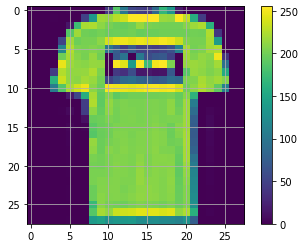

In [18]:
plt.figure()                        ## 생성
plt.imshow(train_images[1])         ## train_image 중 1번에 있는 그림 표시
plt.colorbar()                      
plt.grid(True)
plt.show()

## 3. 딥러닝 입력 데이터 정규화 - Nomalization (255까지 나타난 숫자를 0~1의 범위로 변경)
#### - 학습을 빨리하고 local optimum에 빠지는 가능성 줄임

In [19]:
train_images = train_images / 255.0

test_images = test_images / 255.0

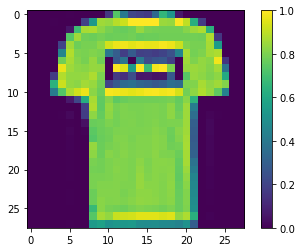

In [20]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

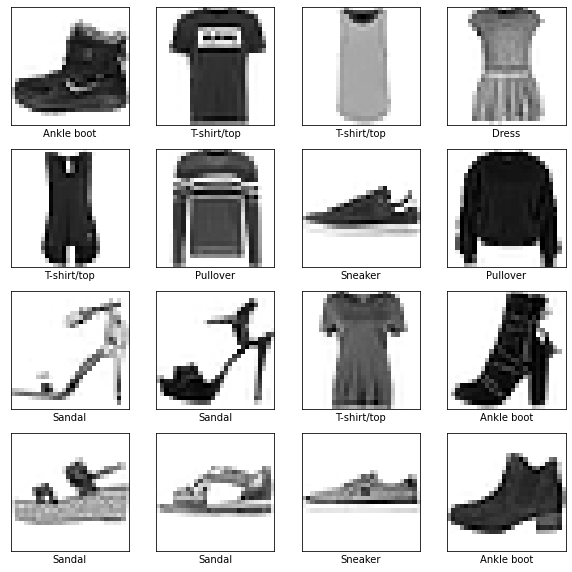

In [37]:
plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [38]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),          ## 28x28 array를 784x1로 변경
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)                              ## 10개의 class 이기 때문에 10개의 최종 output
])